### In this Project, we learn the how to implement Regression Model using Keras:

---

### Libraries

In [1]:
#Import Keras Deep Learning Library
import keras

Using TensorFlow backend.


In [2]:
#Because our network consists of a linear stack of layers, 
#then the Sequential model

from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
#Import Pandas
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Data

In [4]:
concrete = pd.read_csv('Data/Concrete_Data.csv')
concrete.head().T

,0,1,2,3,4
Cement (component 1)(kg in a m^3 mixture),540.00,540.00,332.50,332.50,198.6
Blast Furnace Slag (component 2)(kg in a m^3 mixture),0.00,0.00,142.50,142.50,132.4
Fly Ash (component 3)(kg in a m^3 mixture),0.00,0.00,0.00,0.00,0.0
Water (component 4)(kg in a m^3 mixture),162.00,162.00,228.00,228.00,192.0
Superplasticizer (component 5)(kg in a m^3 mixture),2.50,2.50,0.00,0.00,0.0
Coarse Aggregate (component 6)(kg in a m^3 mixture),1040.00,1055.00,932.00,932.00,978.4
Fine Aggregate (component 7)(kg in a m^3 mixture),676.00,676.00,594.00,594.00,825.5
Age (day),28.00,28.00,270.00,365.00,360.0
"Concrete compressive strength(MPa, megapascals)",79.99,61.89,40.27,41.05,44.3


In [5]:
cols = ['Cement', 'Furnace Slag','Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate','Fine Aggregate','Age', 'Strength']
concrete.columns = cols
concrete.head().T

,0,1,2,3,4
Cement,540.00,540.00,332.50,332.50,198.6
Furnace Slag,0.00,0.00,142.50,142.50,132.4
Fly Ash,0.00,0.00,0.00,0.00,0.0
Water,162.00,162.00,228.00,228.00,192.0
Superplasticizer,2.50,2.50,0.00,0.00,0.0
Coarse Aggregate,1040.00,1055.00,932.00,932.00,978.4
Fine Aggregate,676.00,676.00,594.00,594.00,825.5
Age,28.00,28.00,270.00,365.00,360.0
Strength,79.99,61.89,40.27,41.05,44.3


#### Let's check how many data points we have.

In [7]:
concrete.shape

(1030, 9)

#### Let's check the dataset for any missing values.

In [8]:
concrete.isnull().sum()

Cement              0
Furnace Slag        0
Fly Ash             0
Water               0
Superplasticizer    0
Coarse Aggregate    0
Fine Aggregate      0
Age                 0
Strength            0
dtype: int64

#### Check the Data

In [9]:
values = ['count', 'min', 'max', 'mean', 'std']
concrete.agg(values)

,Cement,Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742


---

### The data is ready to be used to build our model.

#### Preprocessing

In [10]:
features = concrete.drop('Strength', axis=1)
target = concrete['Strength']
print(features.shape, target.shape)

(1030, 8) (1030,)


In [11]:
features.head()

,Cement,Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [12]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

Text(0,0.5,'Strength')

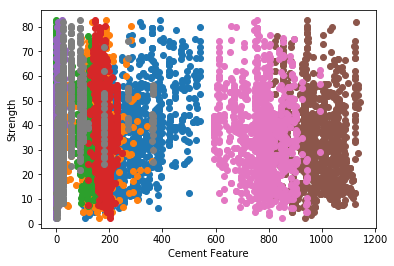

In [13]:
plt.plot(features,target,'o')
plt.xlabel("Cement Feature")
plt.ylabel("Strength")

Text(0,0.5,'Strength')

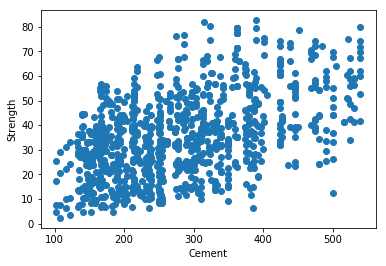

In [14]:
plt.plot(features['Cement'],target,'o')
plt.xlabel("Cement")
plt.ylabel("Strength")

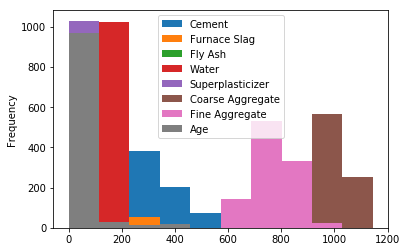

In [15]:
features.plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22baa4fcf8>,
      dtype=object)

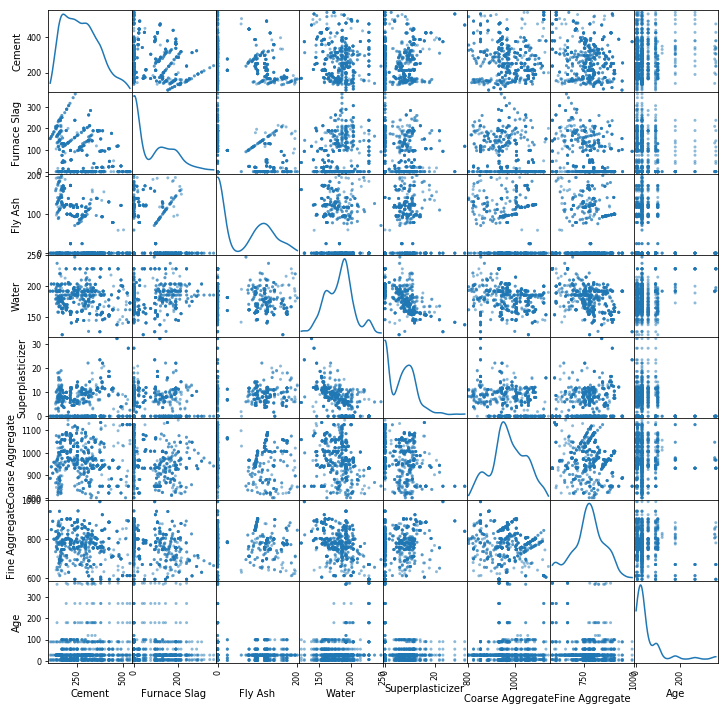

In [16]:
scatter_matrix(features, figsize=(12, 12), diagonal='kde')

### Seaborn Visualization

In [17]:
sns.set(color_codes=True)

### Distributions

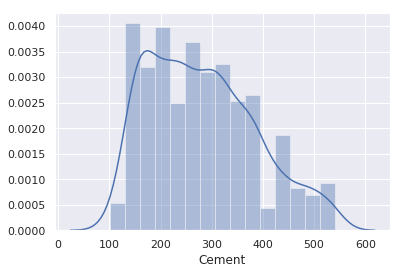

In [18]:
sns.distplot(features['Cement'])

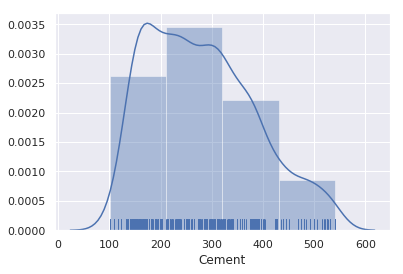

In [19]:
sns.distplot(features['Cement'],
            hist=True,
            kde =True,
            rug=True,
            bins=4)

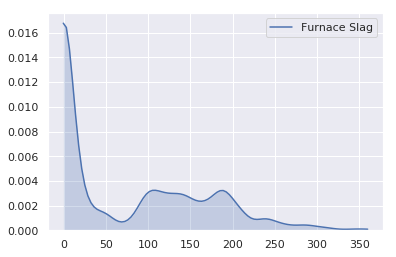

In [20]:
# Kernel Density Estimate... can specify the kind f kernel
sns.kdeplot(features['Furnace Slag'],
            shade=True,
            kernel='gau',
            bw=.13)

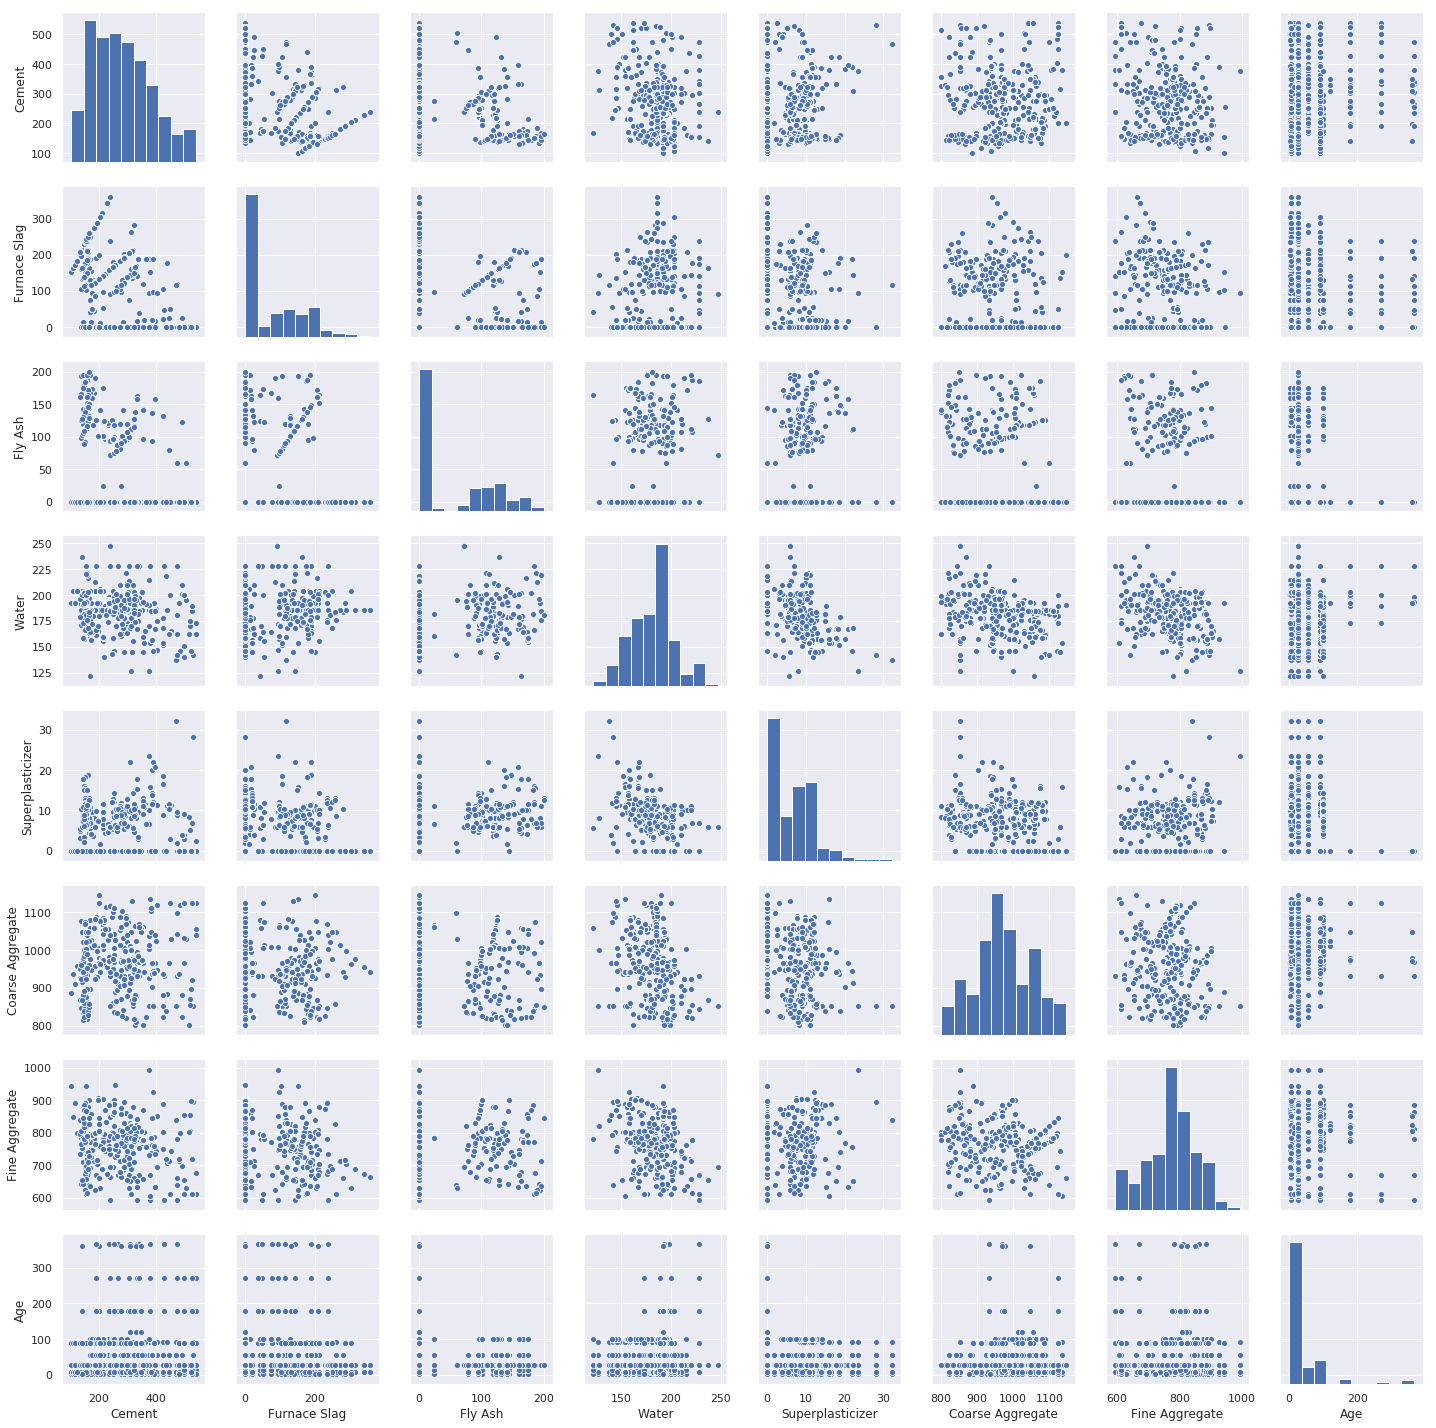

In [21]:
# pairwise relationship
sns.pairplot(features)

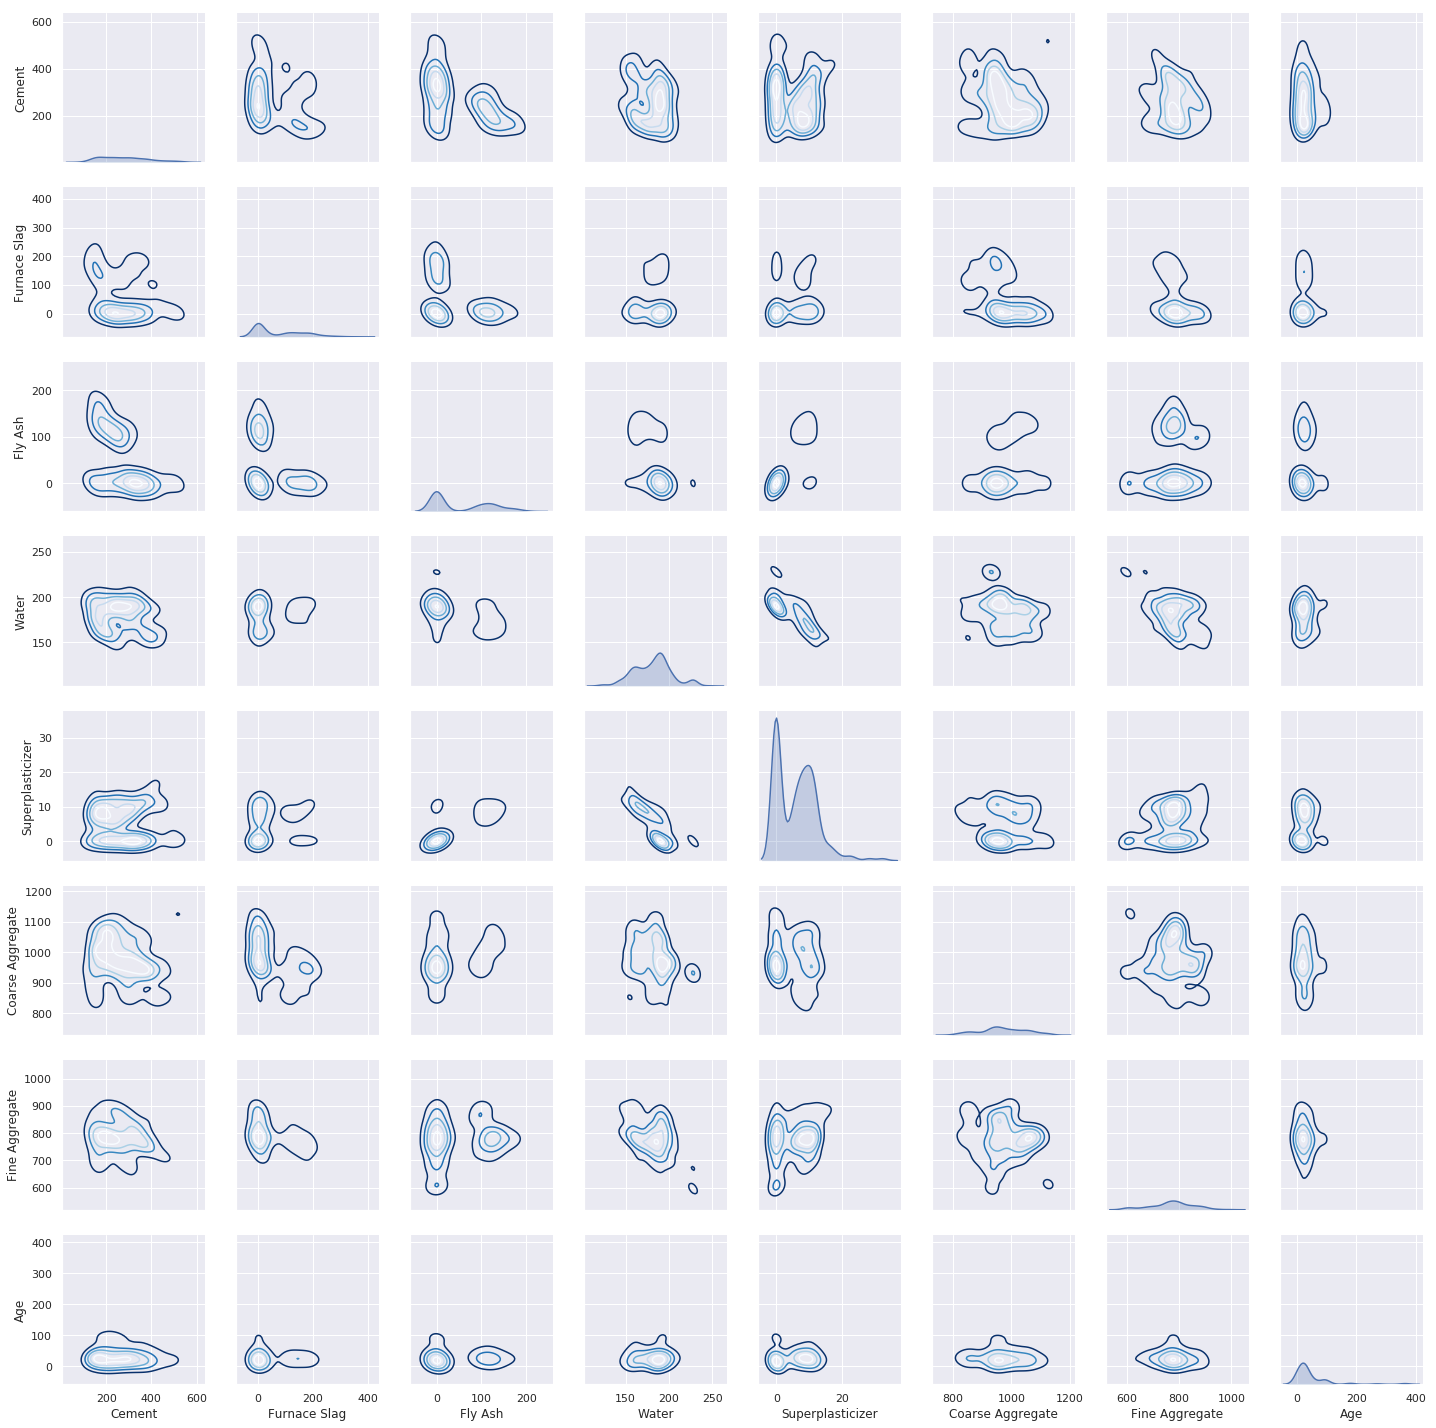

In [22]:
g = sns.PairGrid(features)
g.map_diag(sns.kdeplot, shade=True)
g.map_offdiag(sns.kdeplot, cmap="Blues_r", n_levels=5)

#### Correlation between variables

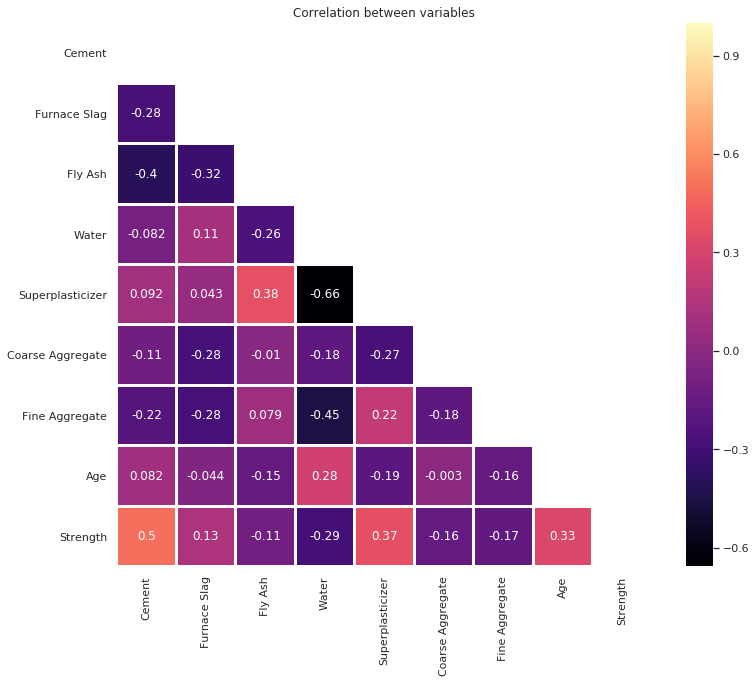

In [23]:
cor = concrete.corr()

mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,10))

with sns.axes_style("white"):
    sns.heatmap(cor,annot=True,linewidth=2,
                mask = mask,cmap="magma")
plt.title("Correlation between variables")
plt.show()

#### Compressive strength distribution

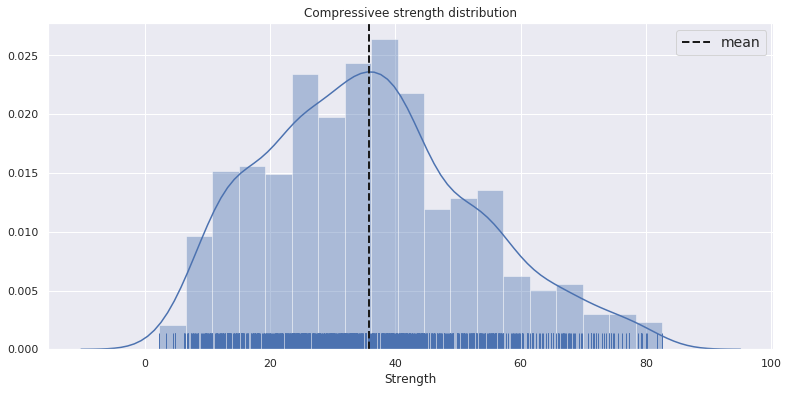

In [24]:
plt.figure(figsize=(13,6))
sns.distplot(target,color="b",rug=True)
plt.axvline(target.mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Compressivee strength distribution")
plt.show()

#### Model

In [25]:
# To create your model, we simply call the Sequential constructor
model = Sequential()

In [27]:
#Get the number of inputs
n_cols = features.shape[1]
n_cols

8

In [28]:
X_train, X_test, y_train, y_test = train_test_split(features,target, random_state = 42)

#### Building Layers / Neural Network

In [29]:
# Building our layers 
#Input layer of 9
#Hidden layer of 5
#Output layer of 1
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

#### Training

In [30]:
#Define the an optimizer and the error metric
#One of the main advantages of the "adam" optimizer 
#is that you don't need to specify the learning rate

model.compile(optimizer='adam', loss='mean_squared_error')

In [36]:
#Use the fit method to train our model with scaled data
model.fit(
    X_train, 
    y_train,
    epochs=1000, 
    shuffle=True, 
    verbose=2)

Epoch 1/1000
 - 0s - loss: 23.9306
Epoch 2/1000
 - 0s - loss: 21.8922
Epoch 3/1000
 - 0s - loss: 29.4266
Epoch 4/1000
 - 0s - loss: 24.3753
Epoch 5/1000
 - 0s - loss: 24.2167
Epoch 6/1000
 - 0s - loss: 24.0524
Epoch 7/1000
 - 0s - loss: 24.2969
Epoch 8/1000
 - 0s - loss: 22.2784
Epoch 9/1000
 - 0s - loss: 24.0215
Epoch 10/1000
 - 0s - loss: 22.3651
Epoch 11/1000
 - 0s - loss: 23.6672
Epoch 12/1000
 - 0s - loss: 23.8043
Epoch 13/1000
 - 0s - loss: 23.1584
Epoch 14/1000
 - 0s - loss: 22.6625
Epoch 15/1000
 - 0s - loss: 22.0207
Epoch 16/1000
 - 0s - loss: 20.5720
Epoch 17/1000
 - 0s - loss: 23.2644
Epoch 18/1000
 - 0s - loss: 23.8215
Epoch 19/1000
 - 0s - loss: 20.6068
Epoch 20/1000
 - 0s - loss: 26.5006
Epoch 21/1000
 - 0s - loss: 22.3022
Epoch 22/1000
 - 0s - loss: 24.3214
Epoch 23/1000
 - 0s - loss: 22.8038
Epoch 24/1000
 - 0s - loss: 21.2833
Epoch 25/1000
 - 0s - loss: 22.7099
Epoch 26/1000
 - 0s - loss: 27.6874
Epoch 27/1000
 - 0s - loss: 25.6414
Epoch 28/1000
 - 0s - loss: 24.9154
E

 - 0s - loss: 21.3959
Epoch 226/1000
 - 0s - loss: 19.2297
Epoch 227/1000
 - 0s - loss: 21.3322
Epoch 228/1000
 - 0s - loss: 22.2302
Epoch 229/1000
 - 0s - loss: 19.2171
Epoch 230/1000
 - 0s - loss: 18.7438
Epoch 231/1000
 - 0s - loss: 22.0610
Epoch 232/1000
 - 0s - loss: 19.6216
Epoch 233/1000
 - 0s - loss: 18.6657
Epoch 234/1000
 - 0s - loss: 17.7419
Epoch 235/1000
 - 0s - loss: 21.8525
Epoch 236/1000
 - 0s - loss: 21.0967
Epoch 237/1000
 - 0s - loss: 28.3704
Epoch 238/1000
 - 0s - loss: 19.5112
Epoch 239/1000
 - 0s - loss: 18.7425
Epoch 240/1000
 - 0s - loss: 19.0151
Epoch 241/1000
 - 0s - loss: 19.0630
Epoch 242/1000
 - 0s - loss: 19.6984
Epoch 243/1000
 - 0s - loss: 18.0958
Epoch 244/1000
 - 0s - loss: 20.6879
Epoch 245/1000
 - 0s - loss: 25.2619
Epoch 246/1000
 - 0s - loss: 22.2245
Epoch 247/1000
 - 0s - loss: 17.6601
Epoch 248/1000
 - 0s - loss: 19.3533
Epoch 249/1000
 - 0s - loss: 18.9798
Epoch 250/1000
 - 0s - loss: 20.8365
Epoch 251/1000
 - 0s - loss: 21.1315
Epoch 252/1000
 

Epoch 447/1000
 - 0s - loss: 15.9626
Epoch 448/1000
 - 0s - loss: 17.0517
Epoch 449/1000
 - 0s - loss: 17.4091
Epoch 450/1000
 - 0s - loss: 15.9801
Epoch 451/1000
 - 0s - loss: 18.3160
Epoch 452/1000
 - 0s - loss: 16.6152
Epoch 453/1000
 - 0s - loss: 18.5183
Epoch 454/1000
 - 0s - loss: 17.9429
Epoch 455/1000
 - 0s - loss: 17.2256
Epoch 456/1000
 - 0s - loss: 17.7355
Epoch 457/1000
 - 0s - loss: 16.6497
Epoch 458/1000
 - 0s - loss: 20.9241
Epoch 459/1000
 - 0s - loss: 16.5876
Epoch 460/1000
 - 0s - loss: 16.0084
Epoch 461/1000
 - 0s - loss: 15.4370
Epoch 462/1000
 - 0s - loss: 16.1784
Epoch 463/1000
 - 0s - loss: 16.0907
Epoch 464/1000
 - 0s - loss: 20.3976
Epoch 465/1000
 - 0s - loss: 16.9016
Epoch 466/1000
 - 0s - loss: 17.2641
Epoch 467/1000
 - 0s - loss: 15.1479
Epoch 468/1000
 - 0s - loss: 18.0618
Epoch 469/1000
 - 0s - loss: 16.5878
Epoch 470/1000
 - 0s - loss: 14.6627
Epoch 471/1000
 - 0s - loss: 15.8289
Epoch 472/1000
 - 0s - loss: 16.4783
Epoch 473/1000
 - 0s - loss: 24.8980
E

Epoch 669/1000
 - 0s - loss: 13.8311
Epoch 670/1000
 - 0s - loss: 13.3568
Epoch 671/1000
 - 0s - loss: 13.2291
Epoch 672/1000
 - 0s - loss: 14.2343
Epoch 673/1000
 - 0s - loss: 13.2595
Epoch 674/1000
 - 0s - loss: 12.9320
Epoch 675/1000
 - 0s - loss: 14.1353
Epoch 676/1000
 - 0s - loss: 15.0467
Epoch 677/1000
 - 0s - loss: 15.6441
Epoch 678/1000
 - 0s - loss: 14.4029
Epoch 679/1000
 - 0s - loss: 14.1946
Epoch 680/1000
 - 0s - loss: 13.3238
Epoch 681/1000
 - 0s - loss: 15.0954
Epoch 682/1000
 - 0s - loss: 14.8150
Epoch 683/1000
 - 0s - loss: 15.0221
Epoch 684/1000
 - 0s - loss: 15.2395
Epoch 685/1000
 - 0s - loss: 13.5262
Epoch 686/1000
 - 0s - loss: 15.5983
Epoch 687/1000
 - 0s - loss: 20.7117
Epoch 688/1000
 - 0s - loss: 17.1811
Epoch 689/1000
 - 0s - loss: 14.4121
Epoch 690/1000
 - 0s - loss: 13.0020
Epoch 691/1000
 - 0s - loss: 15.4987
Epoch 692/1000
 - 0s - loss: 13.5086
Epoch 693/1000
 - 0s - loss: 13.6612
Epoch 694/1000
 - 0s - loss: 13.2807
Epoch 695/1000
 - 0s - loss: 12.8255
E

Epoch 891/1000
 - 0s - loss: 11.5945
Epoch 892/1000
 - 0s - loss: 13.1578
Epoch 893/1000
 - 0s - loss: 11.3977
Epoch 894/1000
 - 0s - loss: 12.0090
Epoch 895/1000
 - 0s - loss: 11.8942
Epoch 896/1000
 - 0s - loss: 11.8947
Epoch 897/1000
 - 0s - loss: 11.8427
Epoch 898/1000
 - 0s - loss: 12.0833
Epoch 899/1000
 - 0s - loss: 10.9517
Epoch 900/1000
 - 0s - loss: 11.3147
Epoch 901/1000
 - 0s - loss: 11.1178
Epoch 902/1000
 - 0s - loss: 12.0454
Epoch 903/1000
 - 0s - loss: 15.3915
Epoch 904/1000
 - 0s - loss: 12.8510
Epoch 905/1000
 - 0s - loss: 13.5902
Epoch 906/1000
 - 0s - loss: 11.1212
Epoch 907/1000
 - 0s - loss: 11.7280
Epoch 908/1000
 - 0s - loss: 10.5260
Epoch 909/1000
 - 0s - loss: 12.0989
Epoch 910/1000
 - 0s - loss: 11.7872
Epoch 911/1000
 - 0s - loss: 13.9144
Epoch 912/1000
 - 0s - loss: 11.0658
Epoch 913/1000
 - 0s - loss: 11.4043
Epoch 914/1000
 - 0s - loss: 11.1612
Epoch 915/1000
 - 0s - loss: 12.7181
Epoch 916/1000
 - 0s - loss: 11.2854
Epoch 917/1000
 - 0s - loss: 11.3080
E

#### Predictions

In [37]:
predictions = model.predict(X_test)
predictions

array([[54.334293 ],
       [43.271786 ],
       [80.59007  ],
       [34.26448  ],
       [14.077139 ],
       [48.14497  ],
       [25.735437 ],
       [56.213436 ],
       [35.303722 ],
       [45.773678 ],
       [39.9745   ],
       [ 8.434304 ],
       [44.54657  ],
       [38.17053  ],
       [31.301638 ],
       [24.160734 ],
       [36.727722 ],
       [18.68234  ],
       [36.973347 ],
       [34.093422 ],
       [31.613607 ],
       [41.973675 ],
       [46.557625 ],
       [10.908582 ],
       [40.414448 ],
       [38.54564  ],
       [12.249596 ],
       [52.25718  ],
       [51.511284 ],
       [14.355311 ],
       [32.969284 ],
       [35.64146  ],
       [43.126106 ],
       [58.993748 ],
       [19.945047 ],
       [36.908848 ],
       [36.257572 ],
       [45.88064  ],
       [11.851779 ],
       [51.043953 ],
       [20.014408 ],
       [ 5.94947  ],
       [40.506557 ],
       [48.567627 ],
       [12.791728 ],
       [72.773    ],
       [50.096573 ],
       [36.20